In [69]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)

import geopandas as gpd
import pandas as pd
import pickle
import os

import seaborn as sns

from matplotlib import pyplot
import contextily as ctx

In [27]:
with open('./data/newG.pkl', 'rb') as input:
    G = pickle.load(input)

In [28]:
gdNotes,gdStreets = ox.utils_graph.graph_to_gdfs(G)

In [40]:
s = gdStreets.apply(lambda x: pd.Series(x['highway']),axis=1).stack()
L = list(s.unique())
L

['residential',
 'cycleway',
 'living_street',
 'footway',
 'tertiary',
 'primary',
 'trunk_link',
 'service',
 'secondary',
 'unclassified',
 'pedestrian',
 'steps',
 'path',
 'secondary_link',
 'trunk',
 'primary_link',
 'motorway_link',
 'track',
 'tertiary_link']

In [56]:
for typeStreet in L:
    gdStreets[typeStreet] = False
    gdStreets.loc[gdStreets.highway.apply(lambda x: typeStreet in x), typeStreet] = True

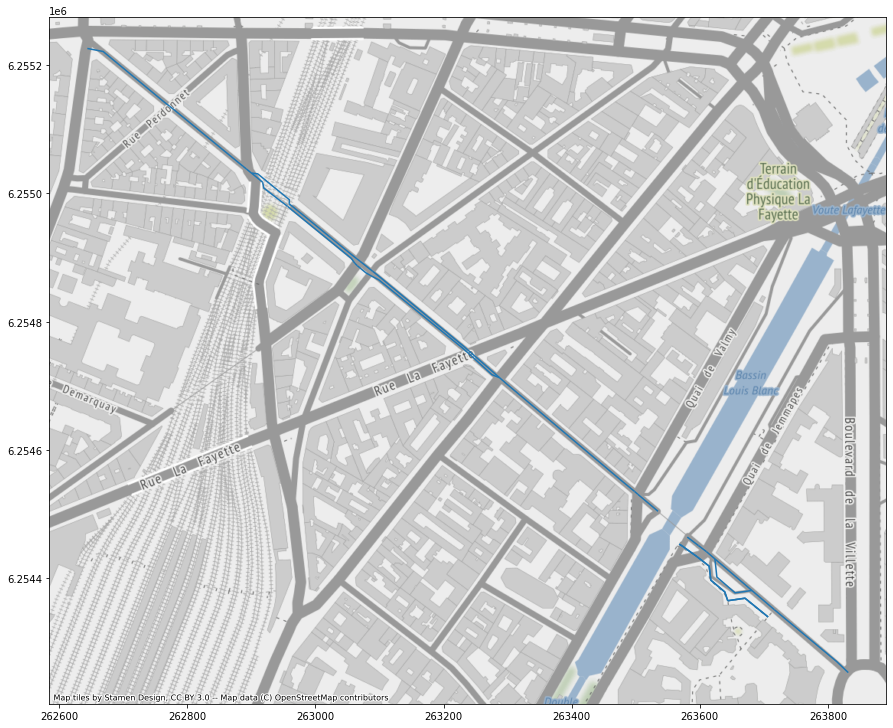

In [71]:
RLB = gdStreets[gdStreets.name == "Rue Louis Blanc"].to_crs(epsg=3857)
ax = RLB.plot(figsize=(15,15))
ctx.add_basemap(ax)

In [66]:
gdStreets

osmid                 name  \
u          v          key                                                
125730     268675130  0                 315818975  Rue Henri Duvernois   
           2841627108 0                  31093720    Rue Louis Lumière   
           244455548  0                  85735969    Rue Louis Lumière   
           1089076050 0    [266463585, 611974677]      Rue Louis Ganne   
268675130  125730     0                 315818975  Rue Henri Duvernois   
...                                           ...                  ...   
8824722819 8824722817 0                 953418664           Voie BX/20   
8824757208 8824757207 0                 953423816           Voie BU/20   
8850821799 8850821788 0                 956353124                  NaN   
8850821789 8850821815 0                 956353129                  NaN   
8858575574 8858575572 0                 957360012            Voie C/10   

                               highway maxspeed  oneway   length  \
u          v          key                                          
125730     268675130  0    residential       30   False    8.707   
           2841627108 0    residential       30   False  128.700   
           244455548  0    residential       30   False  105.925   
           1089076050 0    residential       30   False  124.290   
268675130  125730     0    residential       30   False    8.707   
...                                ...      ...     ...      ...   
8824722819 8824722817 0        service      NaN   False   17.663   
8824757208 8824757207 0        service      NaN   False    8.699   
8850821799 8850821788 0           path      NaN   False    2.825   
8850821789 8850821815 0        service      NaN   False    2.750   
8858575574 8858575572 0        footway      NaN   False   16.639   

                             u_original    v_original  \
u          v          key                               
125730     268675130  0    1.257300e+05  2.686751e+08   
           2841627108 0    1.257300e+05  2.841627e+09   
           244455548  0    1.257300e+05  2.444555e+08   
           1089076050 0    1.257300e+05  1.089076e+09   
268675130  125730     0    2.686751e+08  1.257300e+05   
...                                 ...           ...   
8824722819 8824722817 0    8.824723e+09  8.824723e+09   
8824757208 8824757207 0    8.824757e+09  8.824757e+09   
8850821799 8850821788 0    8.850822e+09  8.850822e+09   
8850821789 8850821815 0    8.850822e+09  8.850822e+09   
8858575574 8858575572 0    8.858576e+09  8.858576e+09   

                                                                    geometry  \
u          v          key                                                      
125730     268675130  0      LINESTRING (2.41073 48.86352, 2.41083 48.86348)   
           2841627108 0    LINESTRING (2.41073 48.86352, 2.41046 48.86425...   
           244455548  0    LINESTRING (2.41073 48.86352, 2.41077 48.86337...   
           1089076050 0    LINESTRING (2.41073 48.86352, 2.41061 48.86351...   
268675130  125730     0      LINESTRING (2.41083 48.86348, 2.41073 48.86352)   
...                                                                      ...   
8824722819 8824722817 0    LINESTRING (2.39055 48.85854, 2.39055 48.85860...   
8824757208 8824757207 0      LINESTRING (2.40618 48.85439, 2.40630 48.85439)   
8850821799 8850821788 0      LINESTRING (2.39887 48.85851, 2.39884 48.85852)   
8850821789 8850821815 0      LINESTRING (2.39730 48.85711, 2.39733 48.85711)   
8858575574 8858575572 0    LINESTRING (2.35242 48.87004, 2.35243 48.87000...   

                           trees  ...  secondary  unclassified  pedestrian  \
u          v          key         ...                                        
125730     268675130  0        6  ...      False         False       False   
           2841627108 0       34  ...      False         False       False   
           244455548  0       25  ...      False         False       False   
           1089076050 0

<AxesSubplot:xlabel='length', ylabel='Count'>

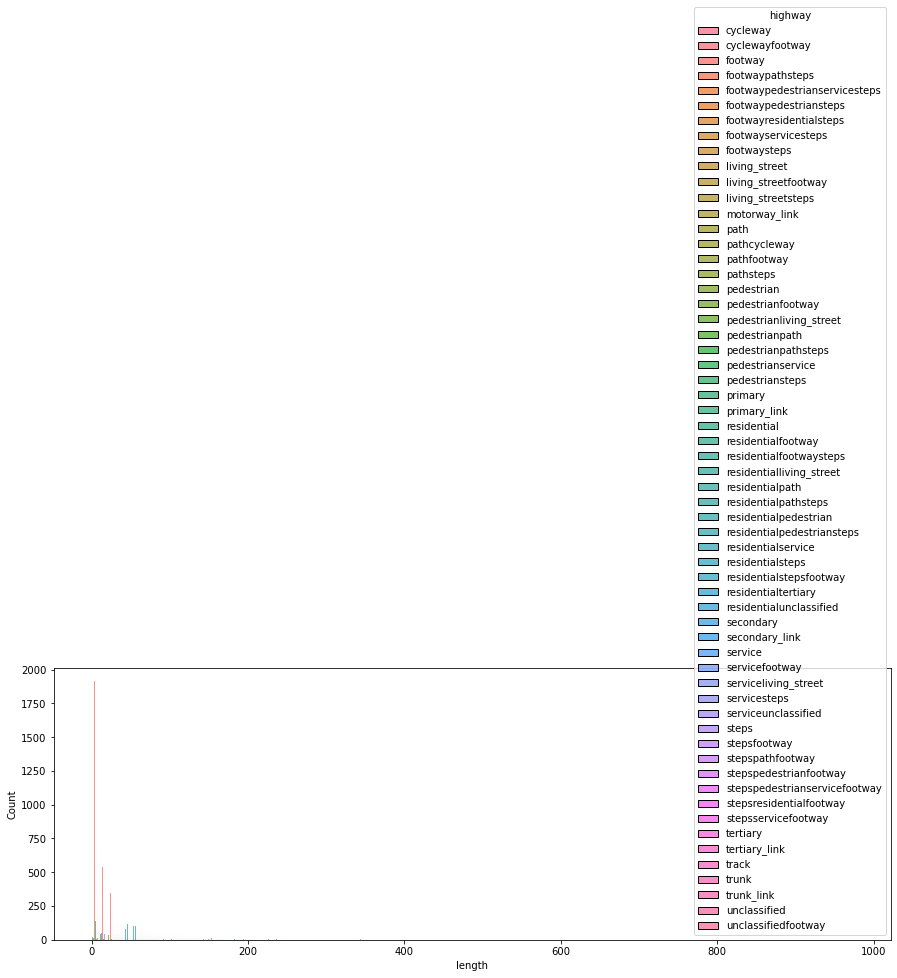

In [22]:
fig, ax = pyplot.subplots(figsize=(15,5))
sns.histplot( gdStreets,ax=ax,x="length",hue="highway", multiple="dodge")